In [1]:
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from statistics import correlation
from scipy import stats

df = pd.read_excel(r'D:\Iris.xlsx')
df = df.drop(columns=['order', 'type', 'petalwid'])

df

,sepallen,sepalwid,petallen
0,7.0,3.2,4.7
1,6.4,3.2,4.5
2,6.9,3.1,4.9
3,5.5,2.3,4.0
4,6.5,2.8,4.6
5,5.7,2.8,4.5
6,6.3,3.3,4.7
7,4.9,2.4,3.3
8,6.6,2.9,4.6
9,5.2,2.7,3.9


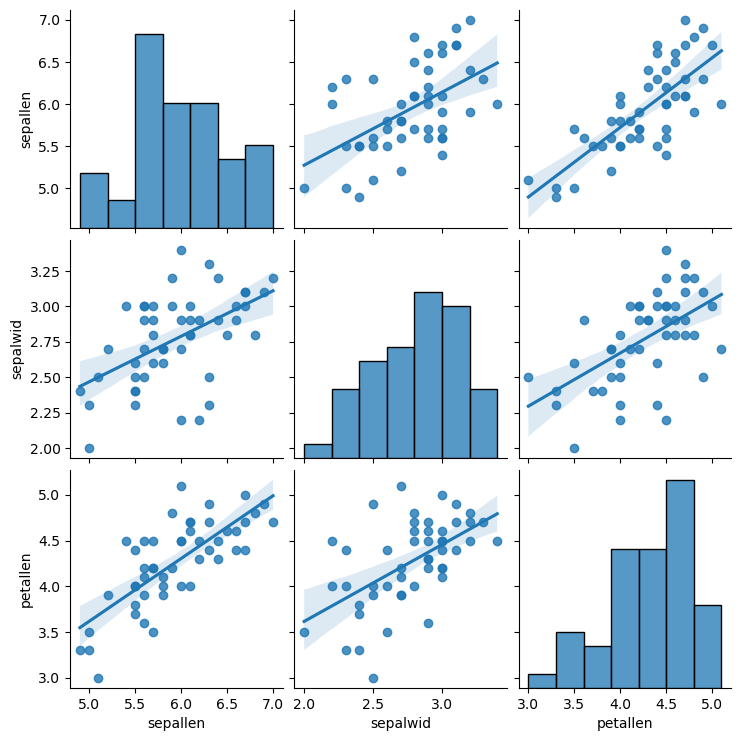

In [2]:
sns.pairplot(df, kind='reg')

plt.show()

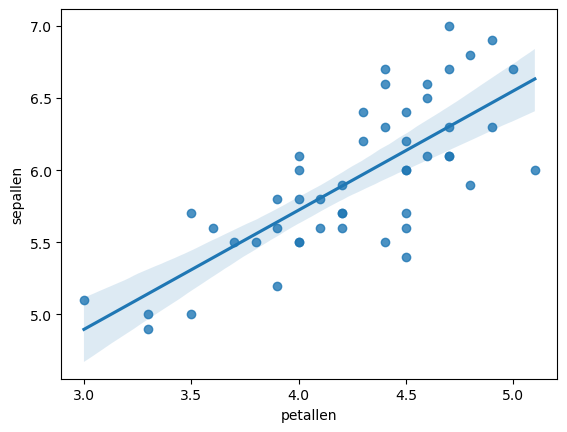

In [3]:
sns.regplot(x = df['petallen'], y = df['sepallen'])

plt.show()

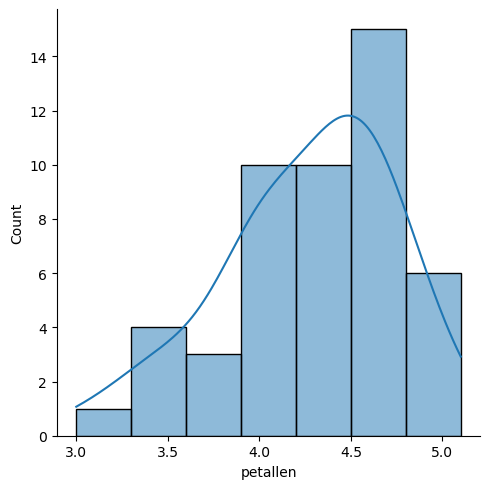

In [19]:
sns.displot(df['petallen'], kde=True)

plt.show()

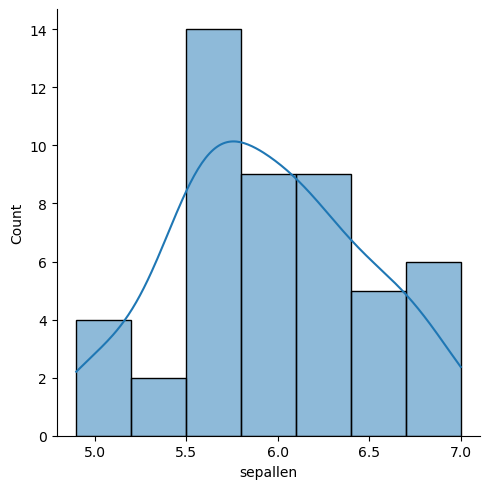

In [20]:
sns.displot(df['sepallen'], kde=True)

plt.show()

In [17]:
print(scipy.stats.shapiro(df['sepallen']))
print(scipy.stats.chisquare(df['sepallen']))

ShapiroResult(statistic=0.9785861372947693, pvalue=0.5075088739395142)
Power_divergenceResult(statistic=2.1879766403297833, pvalue=1.0)


In [5]:
print(scipy.stats.shapiro(df['petallen']))
print(scipy.stats.chisquare(df['petallen']))

ShapiroResult(statistic=0.9635708332061768, pvalue=0.1328628808259964)
Power_divergenceResult(statistic=2.531833413116324, pvalue=1.0)


In [6]:
print('pearson correlation coefficient: ' + str(df['sepallen'].corr(df['petallen'])))

ttest_result = stats.ttest_ind(df['sepallen'], df['petallen'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: 0.7533565896592204
T-test P-value: 4.099232654841027e-30


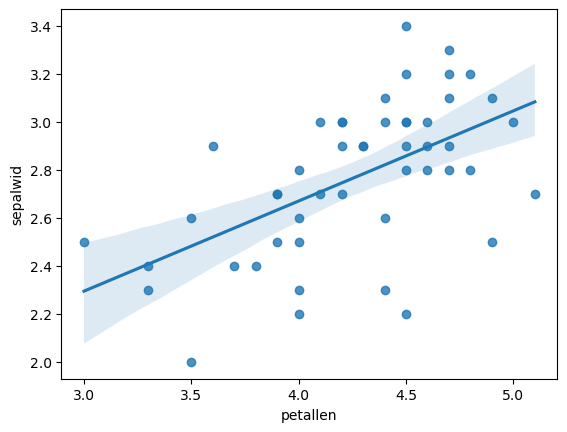

In [21]:
sns.regplot(x = df['petallen'], y = df['sepalwid'])

plt.show()

In [22]:
print('pearson correlation coefficient: ' + str(df['petallen'].corr(df['sepalwid'])))

ttest_result = stats.ttest_ind(df['petallen'], df['sepalwid'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: 0.5619321265400037
T-test P-value: 4.0262691076437856e-33


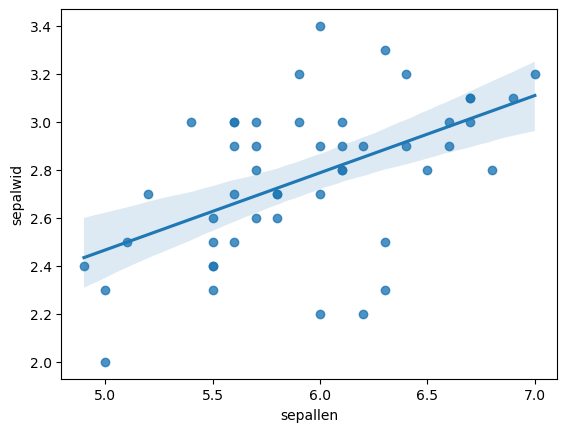

In [8]:
sns.regplot(x = df['sepallen'], y = df['sepalwid'])

plt.show()

In [23]:
print('pearson correlation coefficient: ' + str(df['sepallen'].corr(df['sepalwid'])))

ttest_result = stats.ttest_ind(df['sepallen'], df['sepalwid'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: 0.5280216842864212
T-test P-value: 5.185934148350334e-58


In [9]:
#Начало регрессионного анализа
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepallen,sepalwid,petallen
sepallen,1.000000,0.528022,0.753357
sepalwid,0.528022,1.000000,0.561932
petallen,0.753357,0.561932,1.000000


In [10]:
import statsmodels.api as sm

x, y = df[['sepalwid', 'petallen']], df['sepallen']
x = sm.add_constant (x)

model = sm. OLS (y, x). fit ()
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:               sepallen   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     32.23
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           1.78e-09
Time:                        23:38:45   Log-Likelihood:                -15.554
No. Observations:                  49   AIC:                             37.11
Df Residuals:                      46   BIC:                             42.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1230      0.499      4.253      0.0

In [11]:
x, y = df[['petallen']], df['sepallen']
x = sm.add_constant (x)

model = sm. OLS (y, x). fit ()
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:               sepallen   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     61.68
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           4.21e-10
Time:                        23:38:45   Log-Likelihood:                -16.479
No. Observations:                  49   AIC:                             36.96
Df Residuals:                      47   BIC:                             40.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4163      0.451      5.352      0.0

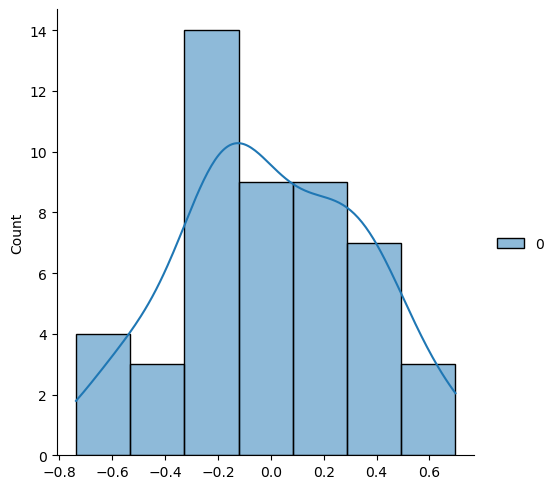

In [12]:
raw_residuals = model.resid

sns.displot(pd.DataFrame(raw_residuals), kde=True)
plt.show()

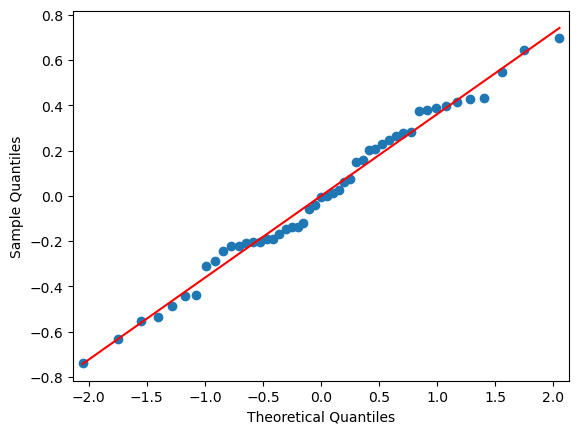

In [13]:
fig = sm.qqplot(raw_residuals, line='r')
plt.show()

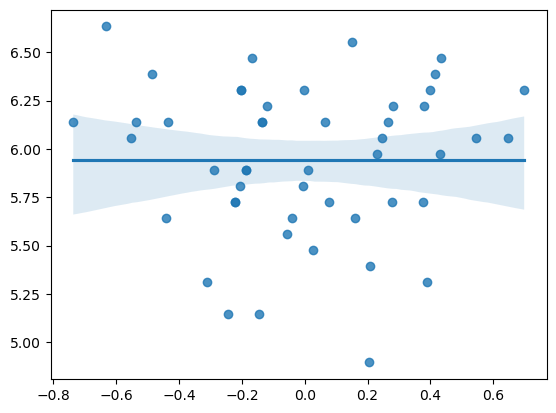

In [14]:
sns.regplot(x = raw_residuals, y = model.predict())

plt.show()

In [15]:
model = sm.formula.ols('sepallen ~ petallen', data=df).fit()
anovatable = sm.stats.anova_lm(model, typ=2)

print(anovatable)

raw_residuals = model.resid

            sum_sq    df          F        PR(>F)
petallen  7.377173   1.0  61.682117  4.213527e-10
Residual  5.621194  47.0        NaN           NaN
